In [29]:
import pandas as pd
import time
import gym
import numpy as np
from gym.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import seaborn as sns
import random
import hiive.mdptoolbox.mdp, hiive.mdptoolbox.example

## 8*8

In [2]:
grid_size_small = 8
#(8*8)
num_state_small = grid_size_small*grid_size_small
np.random.seed(7)
grid_small = generate_random_map(size=grid_size_small)
env_small = gym.make('FrozenLake-v1', desc=grid_small, is_slippery=True)
env_small.seed(7)

total_episodes = 50000
num_iterations = 3000000
num_state_small = grid_size_small*grid_size_small

In [3]:
color_intensity = []
layer_ja = []
len_grid = len("".join(grid_small))
for i in range(grid_size_small):
    for j in range(grid_size_small):
        layer_ja.append(grid_small[i][j])
        if grid_small[i][j] in ['S', 'G']:
            color_intensity.append(1)
        elif grid_small[i][j] == 'H':
            color_intensity.append(0.4)
        else:
            color_intensity.append(0)

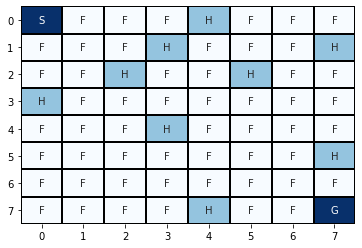

In [4]:
sns.heatmap(np.array(color_intensity).reshape(grid_size_small,grid_size_small), annot=np.array(layer_ja).reshape(grid_size_small,grid_size_small), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

## 50*50

In [4]:
grid_size_big = 50
#(50*50)
num_state_big = grid_size_big*grid_size_big
np.random.seed(7)
grid_big = generate_random_map(size=grid_size_big)
env_big = gym.make('FrozenLake-v1', desc=grid_big, is_slippery=True)
env_big.seed(7)

total_episodes = 50000
num_iterations = 3000000
num_state_big = grid_size_big*grid_size_big

## Value Iteration

In [53]:
def value_iteration(env, no_of_iterations = 100000, gamma = 1.0):
    value_table = np.zeros(env.observation_space.n)
    threshold = 1e-20
    utility_iterations = []
    final_iterations = 0
    time_taken_lists = []
    error_lists = []
    overall_start_time = time.time()
    for i in range(no_of_iterations):
        start_time = time.time()
        updated_value_table = np.copy(value_table)
        utility = np.sum(updated_value_table)
        utility_iterations.append(utility)
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                Q_value.append(np.sum(next_states_rewards))
            value_table[state] = max(Q_value)
        error = np.sum(np.fabs(updated_value_table - value_table))
        error_lists.append(error)
        stop_time = time.time()
        time_taken = stop_time - start_time
        time_taken_lists.append(time_taken)
        if (error <= threshold):
             print('Value-iteration converged at iteration# %d.' %(i+1))
             final_iterations = i+1
             break
    overall_stop_time = time.time()
    overall_time_taken = overall_stop_time - overall_start_time
    return value_table, utility_iterations, final_iterations, overall_time_taken, error_lists, time_taken_lists

def extract_policy(value_table, gamma = 1.0):
    policy = np.zeros(env_small.observation_space.n) 
    for state in range(env_small.observation_space.n):
        Q_table = np.zeros(env_small.action_space.n)
        for action in range(env_small.action_space.n):
            for next_sr in env_small.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    return policy

def plot_policy_v2(rewards, policy, grid, grid_size, title=""):
    sns.color_palette("Set2")
    to_plot_policy = []
    len_grid = "".join(grid)
    for i in range(len(len_grid)):
        if len_grid[i] in ['S', 'G', 'H']:
            if len_grid[i] == 'S':
                to_plot_ policy.append(f"S{symbol_mapping[policy[i]]}")
            else:
                to_plot_policy.append(len_grid[i])
        else :
            to_plot_policy.append(symbol_mapping[policy[i]])
        
    sns.heatmap(rewards.reshape(grid_size,grid_size), annot=np.array(to_plot_policy).reshape(grid_size,grid_size), cmap="Blues", fmt = '')
    plt.title(f'Optimal Policy: {title}');

In [6]:
#Value Iteration Algorithm
def valueIteration(env, gamma=1.0, eps=0):
  value = np.zeros(env.env.nS)
  max_iterations = 10000
  r_v = []

  for i in range(max_iterations):
    prev_v = np.copy(value)
    for s in range(env.env.nS):
      q_sa = [sum([p * (r + prev_v[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(env.env.nA)]
      value[s] = max(q_sa)
    r_v.append((i+1, np.sum(value)-np.sum(prev_v)))
    if (np.sum(np.fabs(prev_v - value)) <= eps):
      converged_at = i+1
      break
  return value, i+1, r_v

In [8]:
value_table_small, utility_iteration_small, final_iterations_small, time_taken_small, error_lists_small, time_taken_lists_small = value_iteration(env_small, gamma=0.99)

Value-iteration converged at iteration# 997.


In [14]:
value_table_big, utility_iteration_big, final_iterations_big, time_taken_big, error_lists_big, time_taken_lists_big = value_iteration(env_big, gamma=0.99)

Value-iteration converged at iteration# 2304.


In [51]:
value_table_big2, utility_iteration_big2, final_iterations_big2, time_taken_big2, error_lists_big2, time_taken_lists_big2 = value_iteration(env_big, gamma=0.9)

Value-iteration converged at iteration# 406.


In [52]:
value_table_small2, utility_iteration_small2, final_iterations_small2, time_taken_small2, error_lists_small2, time_taken_lists_small2 = value_iteration(env_small, gamma=0.9)

Value-iteration converged at iteration# 314.


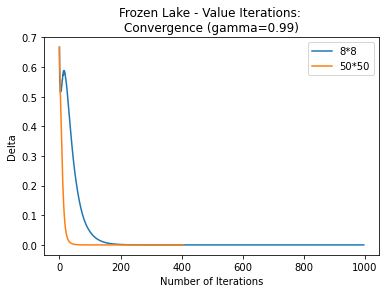

In [53]:
algo = 'Frozen Lake - Value Iterations:'
fig, ax = plt.subplots()
ax.plot(range(final_iterations_small), error_lists_small, label = '8*8')
ax.plot(range(final_iterations_big), error_lists_big, label = '50*50')
#ax.plot(range(final_iterations), np.cumsum(time_taken_lists), label="cumulative time")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Delta')
ax.set_title(f'{algo} \nConvergence (gamma=0.99)')
ax.legend()
plt.show(fig)

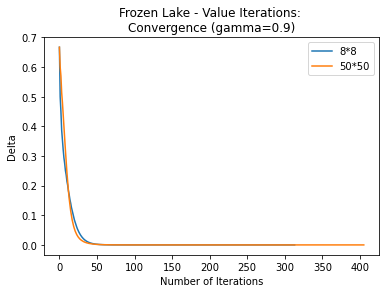

In [54]:
algo = 'Frozen Lake - Value Iterations:'
fig, ax = plt.subplots()
ax.plot(range(final_iterations_small2), error_lists_small2, label = '8*8')
ax.plot(range(final_iterations_big2), error_lists_big2, label = '50*50')
#ax.plot(range(final_iterations), np.cumsum(time_taken_lists), label="cumulative time")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Delta')
ax.set_title(f'{algo} \nConvergence (gamma=0.9)')
ax.legend()
plt.show(fig)

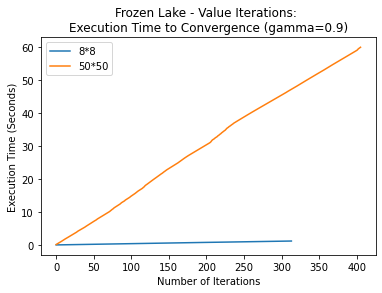

In [57]:
algo = 'Frozen Lake - Value Iterations:'
fig, ax = plt.subplots()
ax.plot(range(final_iterations_small2), np.cumsum(time_taken_lists_small2), label = "8*8")
ax.plot(range(final_iterations_big2), np.cumsum(time_taken_lists_big2), label = "50*50")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title(f'{algo} \nExecution Time to Convergence (gamma=0.9)')
ax.legend()
plt.show(fig)

In [76]:
gamma = 1 
to_loop = np.arange(0.1, 1.01, 0.1)
# 8x8 !! 
vi_util_opt_pol_small = []
vi_num_iterations_small = []
vi_time_taken_list_small = []
vi_error_list_small = []
vi_time_taken_lists_new_small = []
for i in to_loop:
    print("Discount Factor(gamma):", i)
    value_table_small, _, converged_iteration_small, time_taken_small, error_small, time_taken_lists_small = value_iteration(env=env_small, gamma=i)
    vi_util_opt_pol_small.append(value_table_small)
    vi_num_iterations_small.append(converged_iteration_small)
    vi_time_taken_list_small.append(time_taken_small)
    vi_error_list_small.append(error_small)
    vi_time_taken_lists_new_small.append(time_taken_lists_small)
    print("Utility of optimal policy:" ,np.sum(value_table_small), "Time Taken:", time_taken_small, 'Seconds')

Discount Factor(gamma): 0.1
Value-iteration converged at iteration# 21.
Utility of optimal policy: 0.7283686139810926 Time Taken: 0.06995820999145508 Seconds
Discount Factor(gamma): 0.2
Value-iteration converged at iteration# 30.
Utility of optimal policy: 0.8053283412554904 Time Taken: 0.08894920349121094 Seconds
Discount Factor(gamma): 0.30000000000000004
Value-iteration converged at iteration# 39.
Utility of optimal policy: 0.9039406612762202 Time Taken: 0.10295939445495605 Seconds
Discount Factor(gamma): 0.4
Value-iteration converged at iteration# 50.
Utility of optimal policy: 1.0349860895367855 Time Taken: 0.1319255828857422 Seconds
Discount Factor(gamma): 0.5
Value-iteration converged at iteration# 64.
Utility of optimal policy: 1.218223202891323 Time Taken: 0.16591954231262207 Seconds
Discount Factor(gamma): 0.6
Value-iteration converged at iteration# 86.
Utility of optimal policy: 1.4942995740625498 Time Taken: 0.24284720420837402 Seconds
Discount Factor(gamma): 0.700000000000

In [17]:
gamma = 1 
to_loop = np.arange(0.1, 1, 0.1)
# 50x50 !! 
vi_util_opt_pol_big = []
vi_num_iterations_big = []
vi_time_taken_list_big = []
vi_error_list_big = []
vi_time_taken_lists_new_big = []
for i in to_loop:
    print("Discount Factor(gamma):", i)
    value_table_big, _, converged_iteration_big, time_taken_big, error_big, time_taken_lists_big = value_iteration(env=env_big, gamma=i)
    vi_util_opt_pol_big.append(value_table_big)
    vi_num_iterations_big.append(converged_iteration_big)
    vi_time_taken_list_big.append(time_taken_big)
    vi_error_list_big.append(error_big)
    vi_time_taken_lists_new_big.append(time_taken_lists_big)
    print("Utility of optimal policy:" ,np.sum(value_table_big), "Time Taken:", time_taken_big, 'Seconds')

Discount Factor(gamma): 0.1
Value-iteration converged at iteration# 21.
Utility of optimal policy: 0.7411555953206692 Time Taken: 2.6608219146728516 Seconds
Discount Factor(gamma): 0.2
Value-iteration converged at iteration# 30.
Utility of optimal policy: 0.8352478014176151 Time Taken: 3.7518973350524902 Seconds
Discount Factor(gamma): 0.30000000000000004
Value-iteration converged at iteration# 38.
Utility of optimal policy: 0.9575209278829302 Time Taken: 4.752367734909058 Seconds
Discount Factor(gamma): 0.4
Value-iteration converged at iteration# 50.
Utility of optimal policy: 1.1224314580746808 Time Taken: 6.241168737411499 Seconds
Discount Factor(gamma): 0.5
Value-iteration converged at iteration# 66.
Utility of optimal policy: 1.3561290803491466 Time Taken: 8.297289848327637 Seconds
Discount Factor(gamma): 0.6
Value-iteration converged at iteration# 89.
Utility of optimal policy: 1.7104822030604248 Time Taken: 11.32671308517456 Seconds
Discount Factor(gamma): 0.7000000000000001
Val

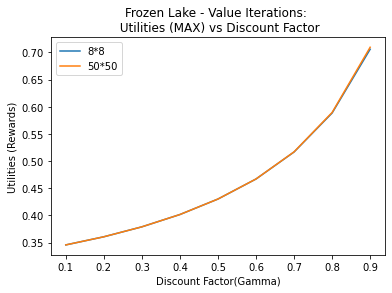

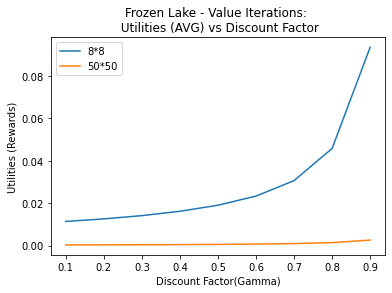

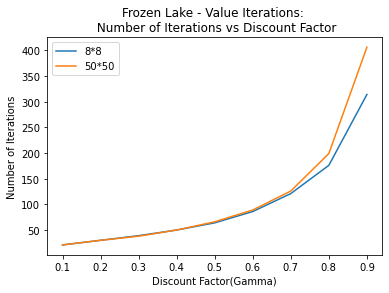

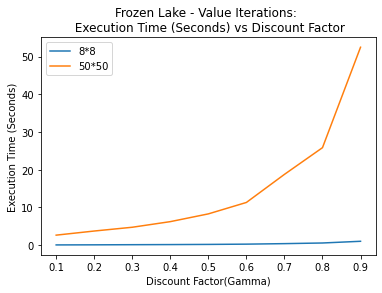

In [66]:
fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.max(i) for i in vi_util_opt_pol_small], label = "8*8")
ax.plot(list(to_loop) , [np.max(i) for i in vi_util_opt_pol_big], label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Value Iterations: \n Utilities (MAX) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.mean(i) for i in vi_util_opt_pol_small], label = "8*8")
ax.plot(list(to_loop) , [np.mean(i) for i in vi_util_opt_pol_big], label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Value Iterations: \n Utilities (AVG) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_num_iterations_small, label = "8*8")
ax.plot(list(to_loop) , vi_num_iterations_big, label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - Value Iterations: \n Number of Iterations vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_time_taken_list_small,label = "8*8")
ax.plot(list(to_loop) , vi_time_taken_list_big,label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Value Iterations: \n Execution Time (Seconds) vs Discount Factor')
ax.legend()
plt.show(fig)



### compare different sizes

In [20]:
gamma = 0.99
# to_loop = np.arange(0.1, 1 , 0.1)
# 4x4 !! 
# grid = generate_random_map(size=6)
size_loop = [4, 8 , 16 , 32 ,64]
visize_util_opt_pol = []
visize_num_iterations = []
visize_time_taken_list = []
visize_error_list = []
visize_time_taken_lists_new = []
for i in size_loop:
    print("size", i)
    n_grid = generate_random_map(size=i)
    n_env = gym.make('FrozenLake-v1', desc=n_grid, is_slippery=True)
    value_table, _, converged_iteration, time_taken, error, time_taken_lists = value_iteration(env=n_env, gamma=gamma)
    visize_util_opt_pol.append(value_table)
    visize_num_iterations.append(converged_iteration)
    visize_time_taken_list.append(time_taken)
    visize_error_list.append(error)
    visize_time_taken_lists_new.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

size 4
Value-iteration converged at iteration# 454.
Utility of optimal policy: 11.396067412728007 Time Taken: 0.4125332832336426 Seconds
size 8
Value-iteration converged at iteration# 1022.
Utility of optimal policy: 25.127760022026845 Time Taken: 3.7000725269317627 Seconds
size 16
Value-iteration converged at iteration# 1976.
Utility of optimal policy: 22.412353640089187 Time Taken: 31.48135995864868 Seconds
size 32
Value-iteration converged at iteration# 1912.
Utility of optimal policy: 43.91170803661444 Time Taken: 111.33322143554688 Seconds
size 64
Value-iteration converged at iteration# 2354.
Utility of optimal policy: 11.715954110074486 Time Taken: 526.5541381835938 Seconds


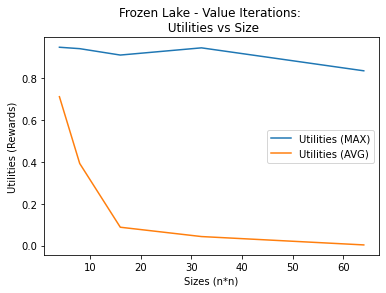

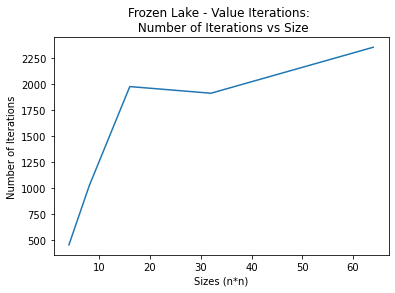

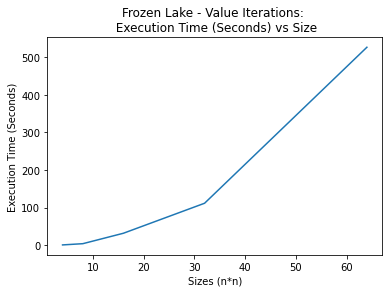

In [67]:
fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.max(i) for i in visize_util_opt_pol], label = "Utilities (MAX)")
ax.plot(list(size_loop) , [np.mean(i) for i in visize_util_opt_pol], label = "Utilities (AVG)")
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Value Iterations: \n Utilities vs Size')
ax.legend()
plt.show(fig)

# fig, ax = plt.subplots()
# ax.plot(list(size_loop) , [np.mean(i) for i in visize_util_opt_pol], "g-")
# ax.set_xlabel('Sizes')
# ax.set_ylabel('Utilities (Rewards)')
# ax.set_title('Value Iterations:Utilities (AVG) vs Size')
# # ax.legend()
# plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , visize_num_iterations)
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - Value Iterations: \n Number of Iterations vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , visize_time_taken_list)
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Value Iterations: \n Execution Time (Seconds) vs Size')
# ax.legend()
plt.show(fig)



## Policy Iteration

In [54]:
def compute_value_function(env, policy, gamma=1.0):
    value_table = np.zeros(env.nS)
    threshold = 1e-10
    while True:
        updated_value_table = np.copy(value_table)
        for state in range(env.nS):
            action = policy[state]
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state]) 
                        for trans_prob, next_state, reward_prob, _ in env.P[state][action]])
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
    return value_table


def extract_policy_pi(env, value_table, gamma = 1.0):
    policy = np.zeros(env.observation_space.n) 
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    
    return policy

def policy_iteration(env, no_of_iterations = 200000, gamma = 1.0):
    random_policy = np.zeros(env.observation_space.n) 
    converge_iterations = 0 
    utility_iterations = []
    start_time = time.time()
    error_list = []
    time_taken_lists = []
#     final_value_table = 
    for i in range(no_of_iterations):
        new_start_time = time.time()
        new_value_function = compute_value_function(env, random_policy, gamma)
        utility = np.sum(new_value_function)
        utility_iterations.append(new_value_function)
        new_policy = extract_policy_pi(env, new_value_function, gamma)
        errors = np.sum((np.fabs(new_policy - random_policy)))
        error_list.append(errors)
        new_end_time = time.time()
        time_taken_lists.append(new_end_time - new_start_time)
        if (np.all(random_policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            converge_iterations = i
            break
        random_policy = new_policy
    stop_time = time.time()
    time_taken = stop_time - start_time
    return new_policy, utility_iterations, converge_iterations, time_taken, error_list, new_value_function, time_taken_lists

In [78]:
gamma = 0.99
policy_small, _, converged_iteration_small, time_taken_small, error_lists_small, value_table_small, time_taken_lists_small = policy_iteration(env=env_small, gamma=0.99)

Policy-Iteration converged at step 11.


In [79]:
gamma = 0.99
policy_big, _, converged_iteration_big, time_taken_big, error_lists_big, value_table_big, time_taken_lists_big = policy_iteration(env=env_big, gamma=0.99)

Policy-Iteration converged at step 56.


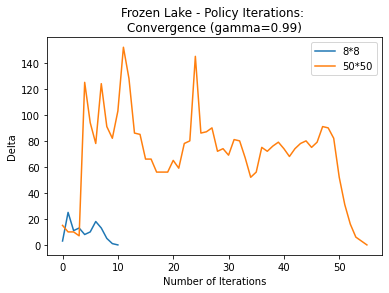

In [80]:
algo = 'Frozen Lake - Policy Iterations:'
fig, ax = plt.subplots()
ax.plot(range(converged_iteration_small+1), error_lists_small, label = "8*8")
ax.plot(range(converged_iteration_big+1), error_lists_big, label = "50*50")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Delta')
ax.set_title(f'{algo} \nConvergence (gamma=0.99)')
ax.legend()
plt.show(fig)

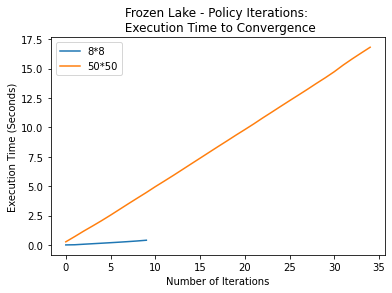

In [76]:
fig, ax = plt.subplots()
ax.plot(range(converged_iteration_small+1), np.cumsum(time_taken_lists_small), label= "8*8")
ax.plot(range(converged_iteration_big+1), np.cumsum(time_taken_lists_big), label= "50*50")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title(f'{algo} \n Execution Time to Convergence')
ax.legend()
plt.show(fig)

In [63]:
size_loop = [4, 8 , 16 , 32 ,64]


size_pi_util_opt_pol = []
size_pi_rewards_table = []
size_pi_num_iterations = []
size_pi_time_taken_list = []
size_pi_error_list = []
size_pi_policy = []
size_pi_time_taken_lists = []
for i in size_loop:
    print("Size:", i)
    n_grid = generate_random_map(size=i)
    n_env = gym.make('FrozenLake-v1', desc=n_grid, is_slippery=True)
    policy, _, converged_iteration, time_taken, error_list, value_table, time_taken_lists = policy_iteration(env=n_env, gamma=gamma)
    size_pi_rewards_table.append(value_table)
    size_pi_policy.append(policy)
    size_pi_num_iterations.append(converged_iteration)
    size_pi_time_taken_list.append(time_taken)
    size_pi_error_list.append(error_list)
    size_pi_time_taken_lists.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

Size: 4
Policy-Iteration converged at step 6.
Utility of optimal policy: 6.034059543709903 Time Taken: 0.17194128036499023 Seconds
Size: 8
Policy-Iteration converged at step 11.
Utility of optimal policy: 7.8290302752371534 Time Taken: 1.6519768238067627 Seconds
Size: 16
Policy-Iteration converged at step 20.
Utility of optimal policy: 23.228810382319658 Time Taken: 20.02924346923828 Seconds
Size: 32
Policy-Iteration converged at step 36.
Utility of optimal policy: 43.291542477588976 Time Taken: 222.47618103027344 Seconds
Size: 64
Policy-Iteration converged at step 70.
Utility of optimal policy: 53.86586613247733 Time Taken: 1898.9402163028717 Seconds


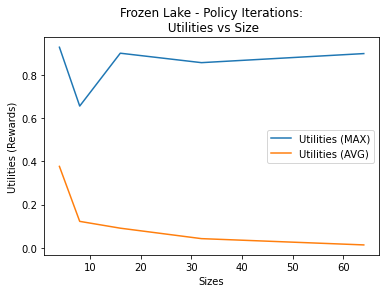

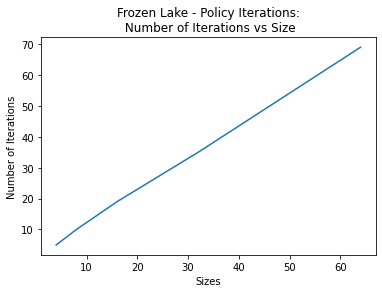

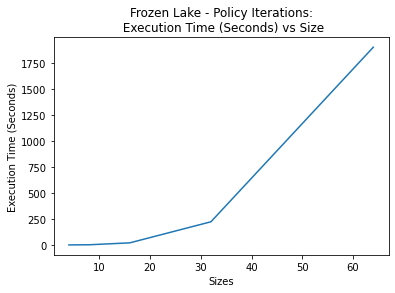

In [69]:
fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.max(i) for i in size_pi_rewards_table], label = "Utilities (MAX)")
ax.plot(list(size_loop) , [np.mean(i) for i in size_pi_rewards_table], label = "Utilities (AVG)")
ax.set_xlabel('Sizes')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Policy Iterations:\n Utilities vs Size')
ax.legend()
plt.show(fig)

# fig, ax = plt.subplots()
# ax.plot(list(size_loop) , [np.mean(i) for i in size_pi_rewards_table], "g-")
# ax.set_xlabel('Sizes')
# ax.set_ylabel('Utilities (Rewards)')
# ax.set_title('Policy Iterations:Utilities (AVG) vs Size')
# # ax.legend()
# plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , size_pi_num_iterations)
ax.set_xlabel('Sizes')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - Policy Iterations:\n Number of Iterations vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , size_pi_time_taken_list)
ax.set_xlabel('Sizes')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Policy Iterations:\n Execution Time (Seconds) vs Size')
# ax.legend()
plt.show(fig)



In [64]:
to_loop_small = np.arange(0.1, 1.01, 0.1)

pi_util_opt_pol_small = []
pi_rewards_table_small = []
pi_num_iterations_small = []
pi_time_taken_list_small = []
pi_error_list_small = []
pi_policy_small = []
pi_time_taken_lists_small = []
for i in to_loop_small:
    print("Discount Factor(gamma):", i)
    policy_small, _, converged_iteration_small, time_taken_small, error_list_small, value_table_small, time_taken_lists_small = policy_iteration(env=env_small, gamma=i)
    pi_rewards_table_small.append(value_table_small)
    pi_policy_small.append(policy_small)
    pi_num_iterations_small.append(converged_iteration_small)
    pi_time_taken_list_small.append(time_taken_small)
    pi_error_list_small.append(error_list_small)
    pi_time_taken_lists_small.append(time_taken_lists_small)
    print("Utility of optimal policy:" ,np.sum(value_table_small), "Time Taken:", time_taken_small, 'Seconds')

Discount Factor(gamma): 0.1
Policy-Iteration converged at step 9.
Utility of optimal policy: 0.7283686139739664 Time Taken: 0.05341672897338867 Seconds
Discount Factor(gamma): 0.2
Policy-Iteration converged at step 9.
Utility of optimal policy: 0.8053283412499002 Time Taken: 0.044969797134399414 Seconds
Discount Factor(gamma): 0.30000000000000004
Policy-Iteration converged at step 9.
Utility of optimal policy: 0.9039406612422396 Time Taken: 0.05495476722717285 Seconds
Discount Factor(gamma): 0.4
Policy-Iteration converged at step 9.
Utility of optimal policy: 1.0349860894889937 Time Taken: 0.06596207618713379 Seconds
Discount Factor(gamma): 0.5
Policy-Iteration converged at step 10.
Utility of optimal policy: 1.2182232028283082 Time Taken: 0.08895134925842285 Seconds
Discount Factor(gamma): 0.6
Policy-Iteration converged at step 10.
Utility of optimal policy: 1.494299573948657 Time Taken: 0.1139535903930664 Seconds
Discount Factor(gamma): 0.7000000000000001
Policy-Iteration converged a

In [66]:
to_loop_big = np.arange(0.1, 0.7, 0.1)

pi_util_opt_pol_big = []
pi_rewards_table_big = []
pi_num_iterations_big = []
pi_time_taken_list_big = []
pi_error_list_big = []
pi_policy_big = []
pi_time_taken_lists_big = []
for i in to_loop_big:
    print("Discount Factor(gamma):", i)
    policy_big, _, converged_iteration_big, time_taken_big, error_list_big, value_table_big, time_taken_lists_big = policy_iteration(env=env_big, gamma=i)
    pi_rewards_table_big.append(value_table_big)
    pi_policy_big.append(policy_big)
    pi_num_iterations_big.append(converged_iteration_big)
    pi_time_taken_list_big.append(time_taken_big)
    pi_error_list_big.append(error_list_big)
    pi_time_taken_lists_big.append(time_taken_lists_big)
    print("Utility of optimal policy:" ,np.sum(value_table_big), "Time Taken:", time_taken_big, 'Seconds')

Discount Factor(gamma): 0.1
Policy-Iteration converged at step 10.
Utility of optimal policy: 0.7411555953132437 Time Taken: 1.5591237545013428 Seconds
Discount Factor(gamma): 0.2
Policy-Iteration converged at step 14.
Utility of optimal policy: 0.8352478013951071 Time Taken: 2.6968884468078613 Seconds
Discount Factor(gamma): 0.30000000000000004
Policy-Iteration converged at step 17.
Utility of optimal policy: 0.9575209278611965 Time Taken: 4.33474326133728 Seconds
Discount Factor(gamma): 0.4
Policy-Iteration converged at step 18.
Utility of optimal policy: 1.1224314580477153 Time Taken: 5.611704111099243 Seconds
Discount Factor(gamma): 0.5
Policy-Iteration converged at step 24.
Utility of optimal policy: 1.3561290802738428 Time Taken: 10.693266868591309 Seconds
Discount Factor(gamma): 0.6
Policy-Iteration converged at step 35.
Utility of optimal policy: 1.7104822029213447 Time Taken: 19.059651613235474 Seconds


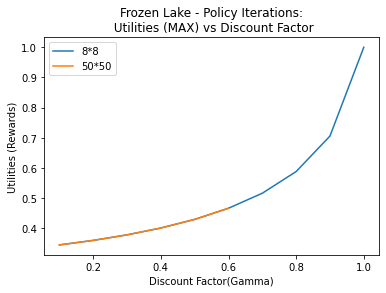

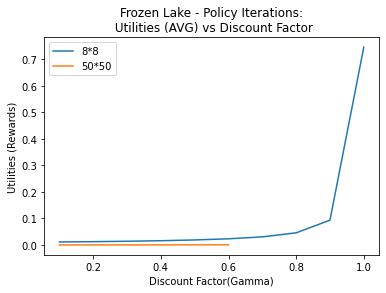

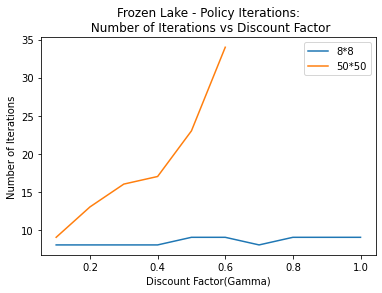

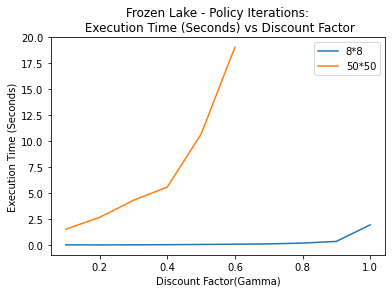

In [67]:
fig, ax = plt.subplots()
ax.plot(list(to_loop_small) , [np.max(i) for i in pi_rewards_table_small], label = "8*8")
ax.plot(list(to_loop_big) , [np.max(i) for i in pi_rewards_table_big], label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Policy Iterations:\n Utilities (MAX) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop_small) , [np.mean(i) for i in pi_rewards_table_small], label = "8*8")
ax.plot(list(to_loop_big) , [np.mean(i) for i in pi_rewards_table_big], label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Policy Iterations:\n Utilities (AVG) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop_small) , pi_num_iterations_small, label = "8*8")
ax.plot(list(to_loop_big) , pi_num_iterations_big, label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - Policy Iterations:\n Number of Iterations vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop_small) , pi_time_taken_list_small, label = "8*8")
ax.plot(list(to_loop_big) , pi_time_taken_list_big, label = "50*50")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Policy Iterations:\n Execution Time (Seconds) vs Discount Factor')
ax.legend()
plt.show(fig)



## VI & PI

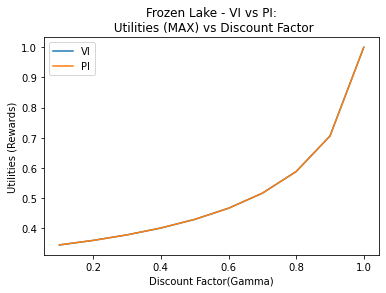

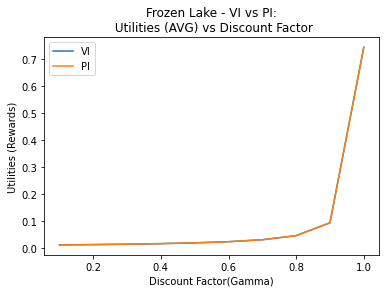

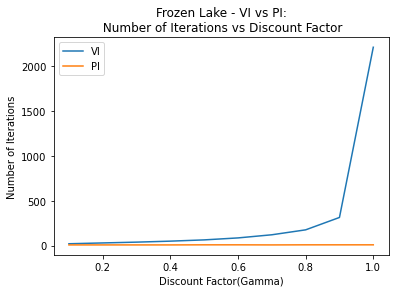

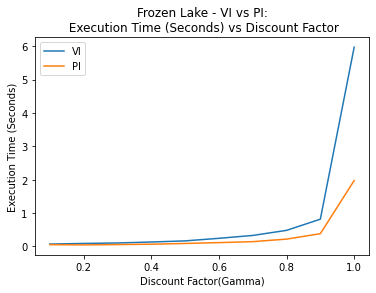

In [77]:
fig, ax = plt.subplots()
to_loop= np.arange(0.1, 1.01, 0.1)
to_loop2= np.arange(0.1, 1.01, 0.1)
ax.plot(list(to_loop) , [np.max(i) for i in vi_util_opt_pol_small], label='VI')
ax.plot(list(to_loop2) , [np.max(i) for i in pi_rewards_table_small],  label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - VI vs PI:\n Utilities (MAX) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.mean(i) for i in vi_util_opt_pol_small],  label='VI')
ax.plot(list(to_loop2) , [np.mean(i) for i in pi_rewards_table_small], label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - VI vs PI:\n Utilities (AVG) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_num_iterations_small,  label='VI')
ax.plot(list(to_loop2) , pi_num_iterations_small,  label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - VI vs PI:\n Number of Iterations vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_time_taken_list_small,  label='VI')
ax.plot(list(to_loop2) , pi_time_taken_list_small,  label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - VI vs PI:\n Execution Time (Seconds) vs Discount Factor')
ax.legend()
plt.show(fig)


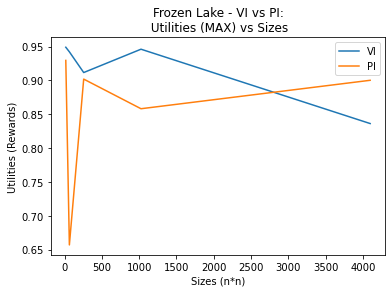

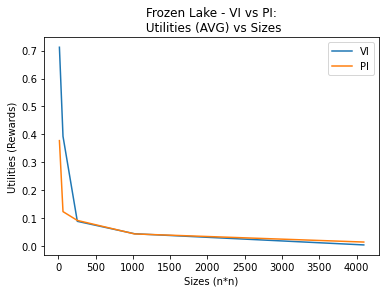

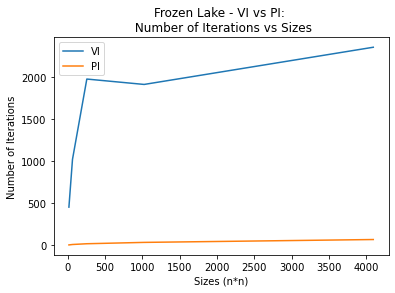

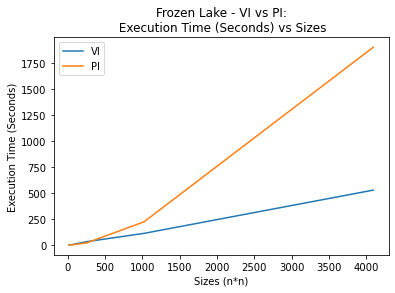

In [96]:
fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , [np.max(i) for i in visize_util_opt_pol], label='VI')
ax.plot([x*x for x in list(size_loop)], [np.max(i) for i in size_pi_rewards_table], label='PI')
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - VI vs PI:\n Utilities (MAX) vs Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in visize_util_opt_pol], label='VI')
#ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in visize_util_opt_pol_big], label='VI:50*50')
ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in size_pi_rewards_table], label='PI')
#ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in size_pi_rewards_table_small], label='PI:50*50')
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - VI vs PI:\n Utilities (AVG) vs Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , visize_num_iterations, label='VI')
#ax.plot([x*x for x in list(size_loop)] , visize_num_iterations_big, label='VI:50*50')
ax.plot([x*x for x in list(size_loop)] , size_pi_num_iterations, label='PI')
#ax.plot([x*x for x in list(size_loop)] , size_pi_num_iterations_big, label='PI:50*50')
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Frozen Lake - VI vs PI: \n Number of Iterations vs Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)], visize_time_taken_list, label='VI')
#ax.plot([x*x for x in list(size_loop)], visize_time_taken_list_big, label='VI:50*50')
ax.plot([x*x for x in list(size_loop)], size_pi_time_taken_list, label='PI')
#ax.plot([x*x for x in list(size_loop)], size_pi_time_taken_list_big, label='PI:50*50')
ax.set_xlabel('Sizes (n*n)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - VI vs PI:\n Execution Time (Seconds) vs Sizes')
ax.legend()
plt.show(fig)

## Q learning 

In [41]:

symbol_mapping = {0:'←', 1:'↓', 2:'→', 3:'↑'}
def run_qlearning_small(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=False):
    print("run with: epsilon", epsilon, "Gamma:", gamma, "Alpha:", alpha, "Decay", epsilon_decay)
    q = {}
    for s in range(env.observation_space.n):
      for a in range(env.action_space.n):
         q[(s,a)] = 0

    def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
         qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
         q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

    def epsilon_greedy_policy(state, epsilon):
         if random.uniform(0,1) < epsilon:
    #          print("Explore")
             return env.action_space.sample()
         else:
    #          print("Exploit")
             return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

    def get_optimal_policy(q_table, num_state):
        optimal_policy = np.zeros(num_state, dtype=int)
        reward_sequences = np.zeros(num_state, dtype=float)
        for s in range(num_state):
            optimal_policy[s] = np.argmax([q[(s, a)] for a in range(env.action_space.n)])
            reward_sequences[s] = q[(s, optimal_policy[s])]

        optimal_sign = []
        for s in range(num_state):
            if s == 0:
                optimal_sign.append(f"S{symbol_mapping[optimal_policy[s]]}")
            elif s == (grid_size_small*grid_size_small-1):
                optimal_sign.append('G')
            elif reward_sequences[s] == 0:
                optimal_sign.append('H')
            else:
                optimal_sign.append(symbol_mapping[optimal_policy[s]])
    #     optimal_sign = [symbol_mapping[i] for i in optimal_policy]
        return optimal_policy, reward_sequences, optimal_sign
    
    total_rewards = []
    iterations_list = []
    start_time = time.time()
    for i in range(total_episodes):
        r = 0
        prev_state = env.reset()
        if i % 100000 == 0:
            print(f"Average Rewards After {i} Episodes", np.mean(total_rewards))
#             Step to take!!
        for j in range(num_iterations):
    #         env.render()
            # In each state, we select the action by epsilon-greedy policy
            action = epsilon_greedy_policy(prev_state, epsilon)

            # then we perform the action and move to the next state, and 
            # receive the reward
            nextstate, reward, done, _ = env.step(action)

            # Next we update the Q value using our update_q_table function
            # which updates the Q value by Q learning update rule

            update_q_table(prev_state, action, reward, nextstate, alpha, gamma)

            # Finally we update the previous state as next state
            prev_state = nextstate

            # Store all the rewards obtained
            r += reward

            #we will break the loop, if we are at the terminal 
            #state of the episode
            if done:
                break

        if epsilon_decay:
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
        total_rewards.append(r)
        iterations_list.append(j)
    #         print("total reward: ", r, epsilon)
    env.close()
    stop_time = time.time()
    time_taken = stop_time - start_time
    ql_optimal_policy, q_rewards, ql_policy_sign = get_optimal_policy(q, num_state)
    return ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iterations_list

In [40]:

symbol_mapping = {0:'←', 1:'↓', 2:'→', 3:'↑'}
def run_qlearning_big(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=False):
    print("run with: epsilon", epsilon, "Gamma:", gamma, "Alpha:", alpha, "Decay", epsilon_decay)
    q = {}
    for s in range(env.observation_space.n):
      for a in range(env.action_space.n):
         q[(s,a)] = 0

    def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
         qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
         q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

    def epsilon_greedy_policy(state, epsilon):
         if random.uniform(0,1) < epsilon:
    #          print("Explore")
             return env.action_space.sample()
         else:
    #          print("Exploit")
             return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

    def get_optimal_policy(q_table, num_state):
        optimal_policy = np.zeros(num_state, dtype=int)
        reward_sequences = np.zeros(num_state, dtype=float)
        for s in range(num_state):
            optimal_policy[s] = np.argmax([q[(s, a)] for a in range(env.action_space.n)])
            reward_sequences[s] = q[(s, optimal_policy[s])]

        optimal_sign = []
        for s in range(num_state):
            if s == 0:
                optimal_sign.append(f"S{symbol_mapping[optimal_policy[s]]}")
            elif s == (grid_size_big*grid_size_big-1):
                optimal_sign.append('G')
            elif reward_sequences[s] == 0:
                optimal_sign.append('H')
            else:
                optimal_sign.append(symbol_mapping[optimal_policy[s]])
    #     optimal_sign = [symbol_mapping[i] for i in optimal_policy]
        return optimal_policy, reward_sequences, optimal_sign
    
    total_rewards = []
    iterations_list = []
    start_time = time.time()
    for i in range(total_episodes):
        r = 0
        prev_state = env.reset()
        if i % 100000 == 0:
            print(f"Average Rewards After {i} Episodes", np.mean(total_rewards))
#             Step to take!!
        for j in range(num_iterations):
    #         env.render()
            # In each state, we select the action by epsilon-greedy policy
            action = epsilon_greedy_policy(prev_state, epsilon)

            # then we perform the action and move to the next state, and 
            # receive the reward
            nextstate, reward, done, _ = env.step(action)

            # Next we update the Q value using our update_q_table function
            # which updates the Q value by Q learning update rule

            update_q_table(prev_state, action, reward, nextstate, alpha, gamma)

            # Finally we update the previous state as next state
            prev_state = nextstate

            # Store all the rewards obtained
            r += reward

            #we will break the loop, if we are at the terminal 
            #state of the episode
            if done:
                break

        if epsilon_decay:
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
        total_rewards.append(r)
        iterations_list.append(j)
    #         print("total reward: ", r, epsilon)
    env.close()
    stop_time = time.time()
    time_taken = stop_time - start_time
    ql_optimal_policy, q_rewards, ql_policy_sign = get_optimal_policy(q, num_state)
    return ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iterations_list

### No decay

In [105]:
alpha = 0.9
gamma = 0.9
total_episodes = 50000
num_iterations = 8000000
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.0001           # Exponential decay rate for exploration prob
epsilon_decay = False

In [110]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = False

list_optimal_small = []
list_qrewards_small = []
list_pol_sign_small = []
list_time_taken_small = []
list_iterations_small = []
for i in epsilon_range:
    print("Epsilon", i)
    ql_optimal_policy_small, q_rewards_small, ql_policy_sign_small, time_taken_small, iteration_small = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, alpha, gamma, i, epsilon_decay=epsilon_decay)
    list_optimal_small.append(ql_optimal_policy_small)
    list_qrewards_small.append(q_rewards_small)
    list_pol_sign_small.append(ql_policy_sign_small)
    list_time_taken_small.append(time_taken_small)
    list_iterations_small.append(iteration_small)

Epsilon 0.1
run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.2
run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.30000000000000004
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.4
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.5
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.6
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.7000000000000001
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.9
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episod

In [113]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = False

list_optimal_big = []
list_qrewards_big = []
list_pol_sign_big = []
list_time_taken_big = []
list_iterations_big = []
for i in epsilon_range:
    print("Epsilon", i)
    ql_optimal_policy_big, q_rewards_big, ql_policy_sign_big, time_taken_big, iteration_big = run_qlearning_big(env_big, total_episodes, num_iterations, num_state_big, alpha, gamma, i, epsilon_decay=epsilon_decay)
    list_optimal_big.append(ql_optimal_policy_big)
    list_qrewards_big.append(q_rewards_big)
    list_pol_sign_big.append(ql_policy_sign_big)
    list_time_taken_big.append(time_taken_big)
    list_iterations_big.append(iteration_big)

Epsilon 0.1
run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.2
run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.30000000000000004
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.4
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.5
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.6
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.7000000000000001
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.9
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episod

### Decay

In [114]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
decay_rate = 0.0001
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability

ep_decay_list_optimal_small = []
ep_decay_list_qrewards_small = []
ep_decay_list_pol_sign_small = []
ep_decay_list_time_taken_small = []
ep_decay_iterations_small = []

for i in epsilon_range:
    ql_optimal_policy_small, q_rewards_small, ql_policy_sign_small, time_taken_small, iterations_small = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, alpha, gamma, i, epsilon_decay=epsilon_decay)
    ep_decay_list_optimal_small.append(ql_optimal_policy_small)
    ep_decay_list_qrewards_small.append(q_rewards_small)
    ep_decay_list_pol_sign_small.append(ql_policy_sign_small)
    ep_decay_list_time_taken_small.append(time_taken_small)
    ep_decay_iterations_small.append(iterations_small)



run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan


In [116]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
decay_rate = 0.0001
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability

ep_decay_list_optimal_big = []
ep_decay_list_qrewards_big = []
ep_decay_list_pol_sign_big = []
ep_decay_list_time_taken_big = []
ep_decay_iterations_big = []

for i in epsilon_range:
    ql_optimal_policy_big, q_rewards_big, ql_policy_sign_big, time_taken_big, iterations_big = run_qlearning_big(env_big, total_episodes, num_iterations, num_state_big, alpha, gamma, i, epsilon_decay=epsilon_decay)
    ep_decay_list_optimal_big.append(ql_optimal_policy_big)
    ep_decay_list_qrewards_big.append(q_rewards_big)
    ep_decay_list_pol_sign_big.append(ql_policy_sign_big)
    ep_decay_list_time_taken_big.append(time_taken_big)
    ep_decay_iterations_big.append(iterations_big)



run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan


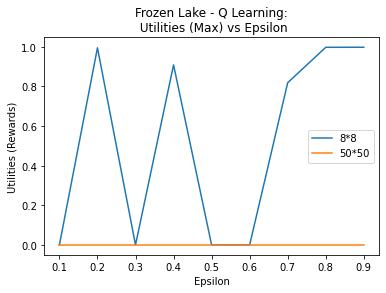

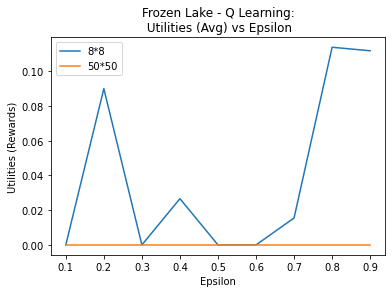

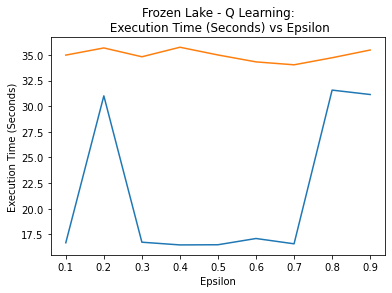

In [118]:
alpha_range = np.arange(0.1, 1, 0.1)
fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.max(i) for i in ep_decay_list_qrewards_small], label = "8*8")
ax.plot(list(alpha_range) , [np.max(i) for i in ep_decay_list_qrewards_big], label = "50*50")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Max) vs Epsilon')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.mean(i) for i in ep_decay_list_qrewards_small], label = "8*8")
ax.plot(list(alpha_range) , [np.mean(i) for i in ep_decay_list_qrewards_big], label = "50*50")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Avg) vs Epsilon')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , ep_decay_list_time_taken_small, label='8*8')
ax.plot(list(alpha_range) , ep_decay_list_time_taken_big, label='50*50')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Q Learning:\n Execution Time (Seconds) vs Epsilon')
# ax.legend()
plt.show(fig)

In [10]:
# fig, ax = plt.subplots()
# color_to_choose = ['r-', 'b-', 'g-', 'y-']
# cnt = 0
# for i in ep_decay_list_qrewards_small:
#     ax.plot(list(epsilon_range) , [np.mean(j) for j in np.array(ep_decay_list_qrewards_small)[i]], label=f'Decay {i}')
#     cnt += 1
# ax.set_xlabel('Epsilon')
# ax.set_ylabel('Utilities (Rewards)')
# ax.set_title('Frozen Lake - Q Learning:\n Utilities (Mean) vs Epsilon')
# ax.legend()
# plt.show(fig)


# fig, ax = plt.subplots()
# #color_to_choose = ['r-', 'b-', 'g-', 'y-']
# #cnt = 0
# for i in ep_decay_list_time_taken.keys():
#     ax.plot(list(epsilon_range) , ep_decay_list_time_taken[i], color_to_choose[cnt], label=f'Decay {i}')
#     cnt += 1
# ax.set_xlabel('Epsilon')
# ax.set_ylabel('Computation Time')
# ax.set_title('Q Learning: Epsilon - Computation Time vs Epsilon')
# ax.legend()
# plt.show(fig)

### Alpha

In [44]:
alpha_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
min_epsilon = 0.01 
max_epsilon = 1.0
new_epsilon = 0.8
decay_rate = 0.0001  

alpha_list_optimal_small = []
alpha_list_qrewards_small = []
alpha_list_pol_sign_small = []
alpha_list_time_taken_small = []
alpha_list_iterations_small = []
for i in alpha_range:
    print("Learning Rates", i)

    ql_optimal_policy_small, q_rewards_small, ql_policy_sign_small, time_taken_small, iterations_small = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, i, gamma, new_epsilon, epsilon_decay=epsilon_decay)

    alpha_list_optimal_small.append(ql_optimal_policy_small)
    alpha_list_qrewards_small.append(q_rewards_small)
    alpha_list_pol_sign_small.append(ql_policy_sign_small)
    alpha_list_time_taken_small.append(time_taken_small)
    alpha_list_iterations_small.append(iterations_small)

Learning Rates 0.1
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.1 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.2
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.2 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.30000000000000004
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.30000000000000004 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.4
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.4 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.5
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.5 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.6
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.6 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.7000000000000001
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.7000000000000001 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.8 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.9
run with: epsilon 0.8 Gamma: 0.

In [45]:
alpha_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
new_epsilon = 0.8
decay_rate = 0.0001  

alpha_list_optimal_big = []
alpha_list_qrewards_big = []
alpha_list_pol_sign_big = []
alpha_list_time_taken_big = []
alpha_list_iterations_big = []
for i in alpha_range:
    print("Learning Rates", i)
#     env = gym.make('FrozenLake-v0', desc=grid, is_slippery=False)
    ql_optimal_policy_big, q_rewards_big, ql_policy_sign_big, time_taken_big, iterations_big = run_qlearning_big(env_big, total_episodes, num_iterations, num_state_big, i, gamma, new_epsilon, epsilon_decay=epsilon_decay)
#     ql_optimal_policy, q_rewards, ql_policy_sign, time_taken = run_qlearning(env, total_episodes, num_state, i, gamma, epsilon, epsilon_decay=epsilon_decay)
    alpha_list_optimal_big.append(ql_optimal_policy_big)
    alpha_list_qrewards_big.append(q_rewards_big)
    alpha_list_pol_sign_big.append(ql_policy_sign_big)
    alpha_list_time_taken_big.append(time_taken_big)
    alpha_list_iterations_big.append(iterations_big)

Learning Rates 0.1
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.1 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.2
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.2 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.30000000000000004
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.30000000000000004 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.4
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.4 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.5
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.5 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.6
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.6 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.7000000000000001
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.7000000000000001 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.8 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.9
run with: epsilon 0.8 Gamma: 0.

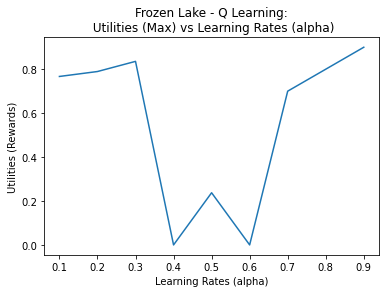

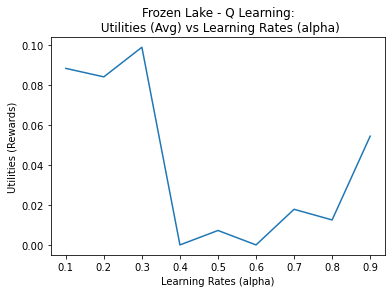

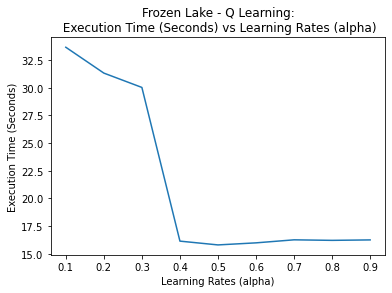

In [46]:
fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.max(i) for i in alpha_list_qrewards_small], label = "8*8")
#ax.plot(list(alpha_range) , [np.max(i) for i in alpha_list_qrewards_big], label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Max) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.mean(i) for i in alpha_list_qrewards_small], label = "8*8")
#ax.plot(list(alpha_range) , [np.mean(i) for i in alpha_list_qrewards_big], label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Avg) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , alpha_list_time_taken_small, label = "8*8")
#ax.plot(list(alpha_range) , alpha_list_time_taken_big, label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Q Learning:\n Execution Time (Seconds) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

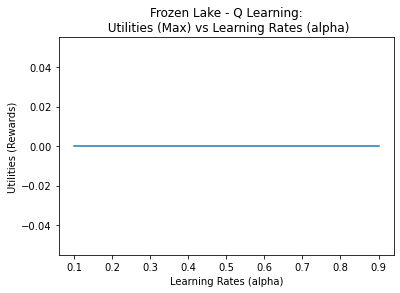

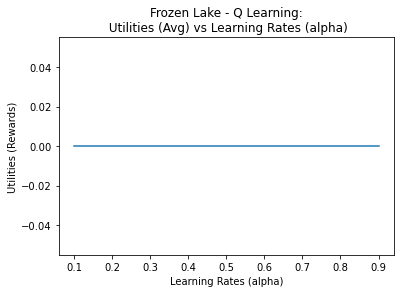

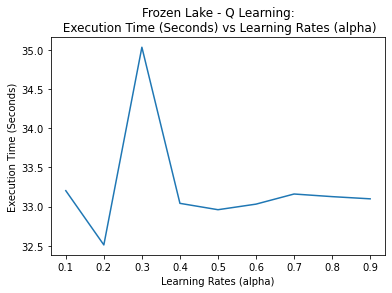

In [47]:
fig, ax = plt.subplots()
#ax.plot(list(alpha_range) , [np.max(i) for i in alpha_list_qrewards_small], label = "8*8")
ax.plot(list(alpha_range) , [np.max(i) for i in alpha_list_qrewards_big], label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Max) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
#ax.plot(list(alpha_range) , [np.mean(i) for i in alpha_list_qrewards_small], label = "8*8")
ax.plot(list(alpha_range) , [np.mean(i) for i in alpha_list_qrewards_big], label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Frozen Lake - Q Learning:\n Utilities (Avg) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
#ax.plot(list(alpha_range) , alpha_list_time_taken_small, label = "8*8")
ax.plot(list(alpha_range) , alpha_list_time_taken_big, label = "50*50")
ax.set_xlabel('Learning Rates (alpha)')
ax.set_ylabel('Execution Time (Seconds)')
ax.set_title('Frozen Lake - Q Learning:\n Execution Time (Seconds) vs Learning Rates (alpha)')
#ax.legend()
plt.show(fig)

In [106]:
env_small = gym.make('FrozenLake-v1', desc=grid_small, is_slippery=True)
env_small.seed(7)
P = np.zeros([env_small.nA, env_small.nS, env_small.nS])
R = np.zeros([env_small.nS, env_small.nA])
for s in range(env_small.nS):
    for a in range(env_small.nA):
        transitions = env_small.P[s][a]
        for p_trans, next_s, reward, _ in transitions:
            P[a,s,next_s] += p_trans
            R[s,a] = reward
        P[a,s,:] /= np.sum(P[a,s,:])


In [117]:
def analyze_param_policy(P, R, solver_type = "PI",
                 param = "gamma", param_range = [0.97, 0.98, 0.99,0.993], max_iter = 500, gamma = 0.99, epsilon_V = 0.01, display = True
                        ,epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                        alpha = 0.1, alpha_decay = 0.99, alpha_min=0.001, size = "8x8", fig_name = ""):
    
    
    
    graph_params = ["Mean V", "Max V", "Error", "Time"]
    if solver_type == "PI":
        solver = lambda dict_args: hiive.mdptoolbox.mdp.PolicyIteration(**dict_args)
        args = {"transitions":P, "reward":R, "gamma":gamma, "max_iter":max_iter, "skip_check":True}
    elif solver_type == "VI":
        solver = lambda dict_args: hiive.mdptoolbox.mdp.ValueIteration(**dict_args)
        args = {"transitions":P, "reward":R, "gamma":gamma,"epsilon":epsilon_V, "max_iter":max_iter, "skip_check":True}
    elif solver_type == "Q":
        solver_type = "QL"
        solver = lambda dict_args: hiive.mdptoolbox.mdp.QLearning(**dict_args)
        
        args = {"transitions":P, "reward":R, "gamma":gamma,
                "epsilon":epsilon, "epsilon_min": epsilon_min, "epsilon_decay": epsilon_decay, 
                "alpha": alpha, "alpha_decay": alpha_decay, "alpha_min":alpha_min,
                "n_iter":max_iter, "skip_check":True}
        graph_params = ["Mean V", "Max V", "Alpha","Epsilon", "Error", "Time"]
    else:
        throw("Wrong solver Type")
    
    df = pd.DataFrame(index = range(max_iter))
    for val in param_range:
        np.random.seed(7)
        args[param] = val 
        mdp = solver(args)
        #print(mdp)
        mdp.run()
        df_temp = pd.DataFrame(mdp.run_stats)
        #print(df_temp)
        df_temp = df_temp.set_index("Iteration")
        df_temp = df_temp.add_suffix("_"+ param+ "_" + str(val) + "_" + solver_type)
        
        df = df.join(df_temp)
    df.ffill(inplace= True)
    
    if display:
        plot_param(df, title =solver_type + " - " + param + " " + size, params =graph_params, fig_name = fig_name)
        
    print(df.shape)    
    return df

(500000, 40)


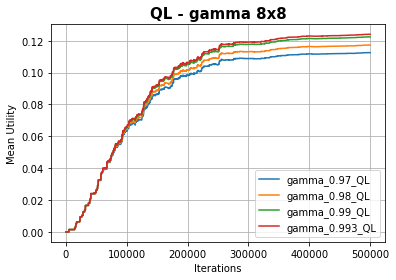

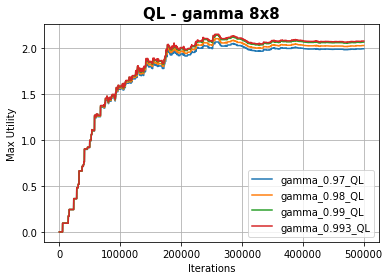

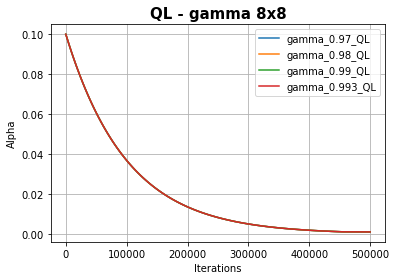

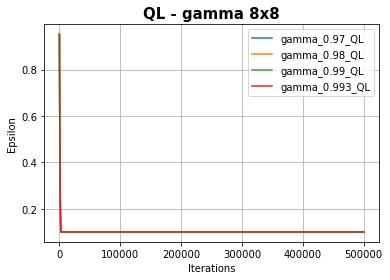

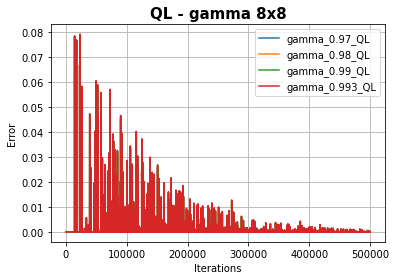

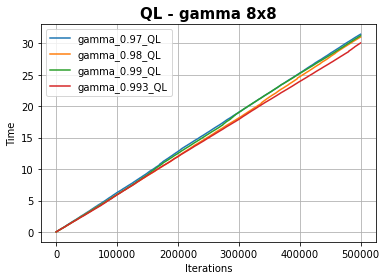

(500000, 40)


In [118]:
results = analyze_param_policy(P, R, solver_type = "Q", max_iter=500000, epsilon = 1, epsilon_decay = 0.999,
                               alpha_decay = 0.99999, fig_name="Fig 3.4a")

(500000, 60)


D:\Program Files\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


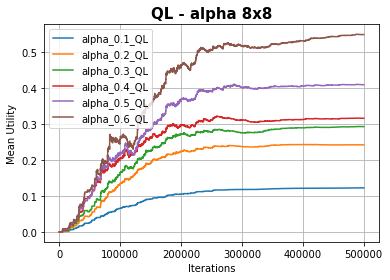

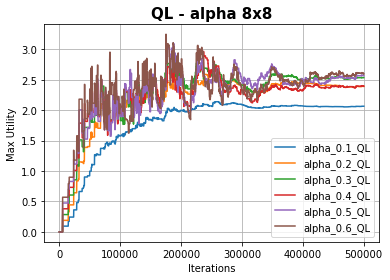

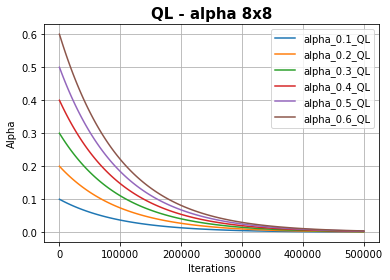

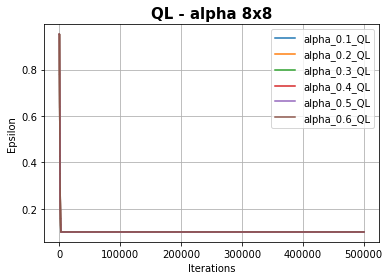

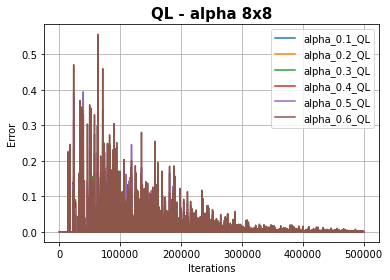

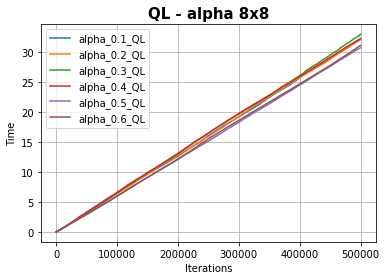

(500000, 60)


In [120]:
results = analyze_param_policy(P, R, solver_type = "Q", max_iter=500000, epsilon = 1, epsilon_decay = 0.999,
                               param = "alpha", param_range = [0.1, 0.2,0.3, 0.4, 0.5, 0.6], alpha_decay = 0.99999, fig_name="")

(500000, 40)


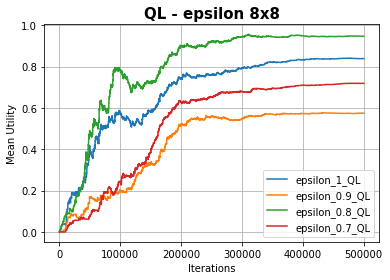

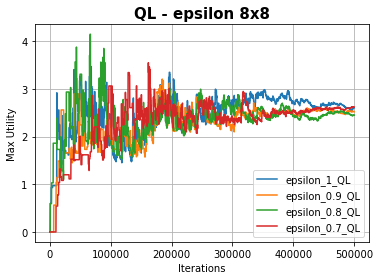

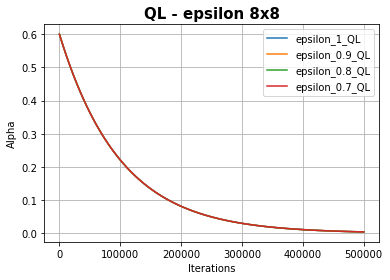

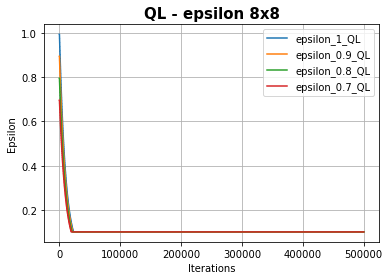

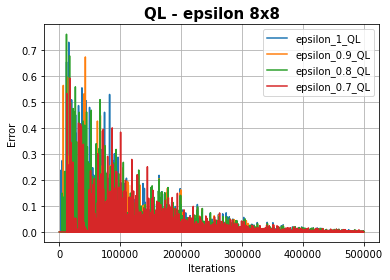

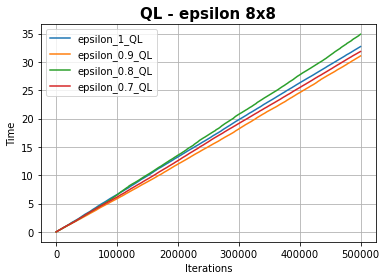

(500000, 40)


In [121]:
results_epsilon = analyze_param_policy(P, R, solver_type = "Q", max_iter=500000, epsilon_decay = 0.9999, alpha_decay = 0.99999,
                               param = "epsilon", param_range = [1, 0.9, 0.8, 0.7], alpha = 0.6)

(500000, 40)


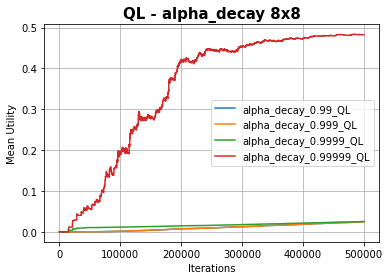

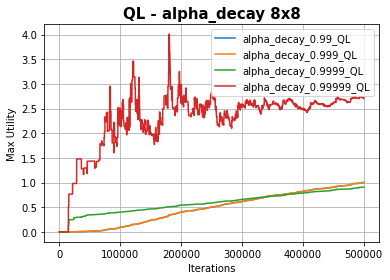

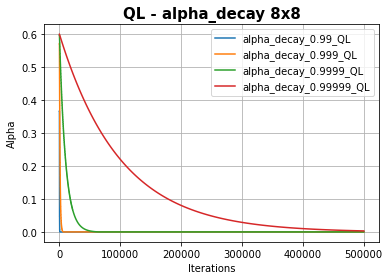

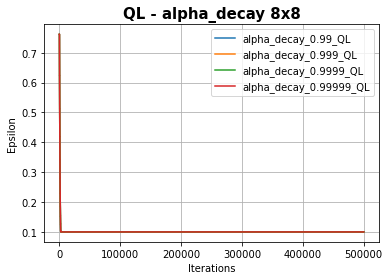

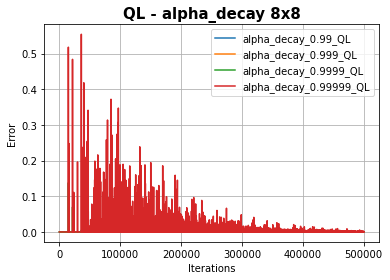

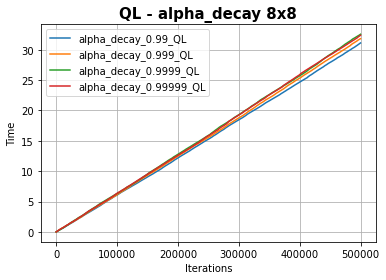

(500000, 40)


In [122]:
results_alpha = analyze_param_policy(P, R, solver_type = "Q", max_iter=500000, epsilon = 0.8, epsilon_decay = 0.999,
                               param = "alpha_decay", param_range = [0.99, 0.999,0.9999, 0.99999], alpha = 0.6)

(500000, 40)


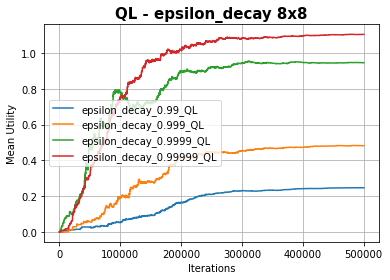

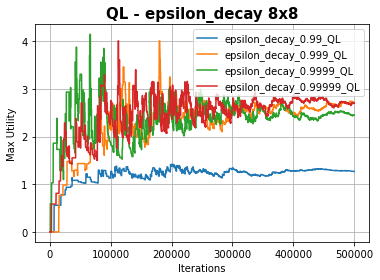

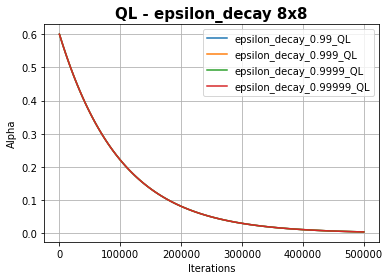

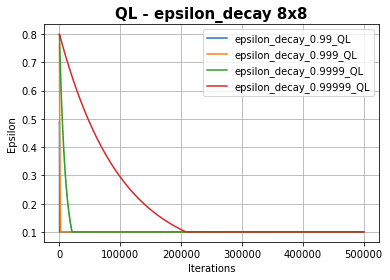

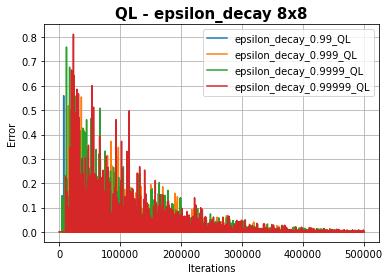

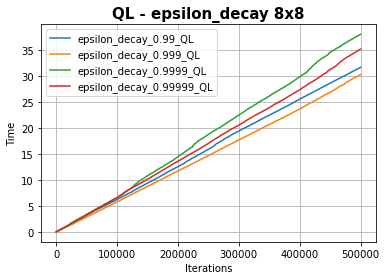

(500000, 40)


In [125]:
results = analyze_param_policy(P, R, solver_type = "Q", max_iter=500000, epsilon = 0.8, alpha_decay = 0.99999,
                               param = "epsilon_decay", param_range = [0.99, 0.999,0.9999, 0.99999], alpha = 0.6)

In [126]:
np.random.seed(7)
ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.993, n_iter = 10**6 , epsilon = 0.8, epsilon_decay = 0.99999,
                               alpha = 0.5, alpha_decay = 0.99999, skip_check=True)
test = ql.run()



In [127]:
def plot_run_stats(mdp, title = "MDP", params = ["Mean V", "Max V", "Error", "Time"]):
    df = pd.DataFrame(mdp.run_stats)
    df = df.set_index("Iteration")
    plot_param(df, params, title)

(10000, 10)


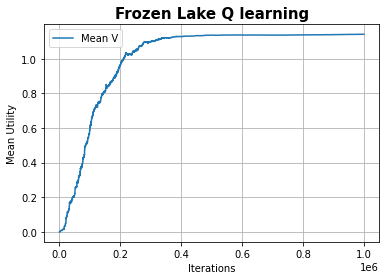

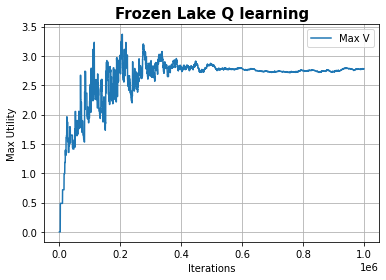

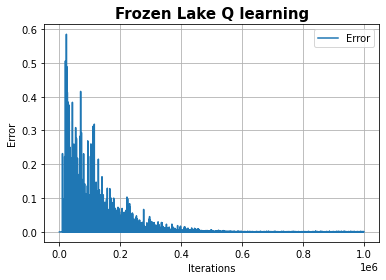

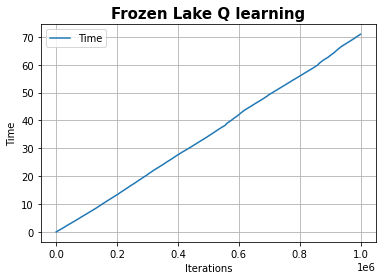

In [129]:
plot_run_stats(ql, "Frozen Lake Q learning")



## Policies

In [59]:
# Evaluate each policy and get scores !! 
def play_agent(env, policy):
     prev_state = env.reset()
     starting_state = 0
     r = 0
     while True:
        nextstate, reward, done, _ = env.step(policy[starting_state])
        starting_state = nextstate
        r += reward
        if done:
           break
     return r


def run_policy(env, policy, n = 1000):
    list_score = []
    for i in range(n):
        scores = play_agent(env, policy)
        list_score.append(scores)
    return np.sum(list_score)/len(list_score)

# def run_policy(env, policy, n = 10000):
#     list_score = []
#     for i in range(n):
#         state = env.reset()
#         done = False
#         while not done:
#             state,reward,done,info = env.step(policy.policy[state])
#         list_score.append(reward)
#     return np.mean(list_score)


### Qlearning

run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.5 Decay False
Average Rewards After 0 Episodes nan
Q learning-iteration converged at iteration# 50000
Value Iterations - Optimal Policy Pass 10.35 % 13.051579713821411 s


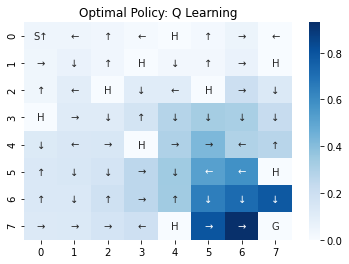

In [63]:
# Final policy!!
alpha = 0.5
epsilon = 0.8
gamma = 0.9
epsilon_decay = False
fin_ql_optimal_policy, fin_q_rewards, fin_ql_policy_sign, time_taken, ql_iterations = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)
plot_policy_v2(fin_q_rewards, fin_ql_optimal_policy, grid=grid_small,grid_size=8, title="Q Learning")
print("Q learning-iteration converged at iteration#",len(ql_iterations))
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, fin_ql_optimal_policy, 10000) * 100, "%", time_taken, 's')

run with: epsilon 0.8 Gamma: 0.993 Alpha: 0.6 Decay False
Average Rewards After 0 Episodes nan
Q learning-iteration converged at iteration# 50000
Value Iterations - Optimal Policy Pass 22.125 % 15.417214632034302 s


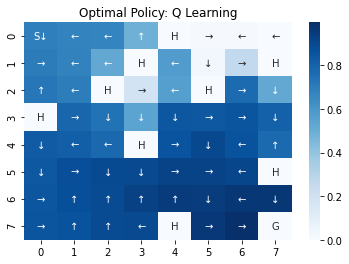

In [131]:
# Final policy!!
alpha = 0.6
epsilon = 0.8
gamma = 0.993
epsilon_decay = False
fin_ql_optimal_policy, fin_q_rewards, fin_ql_policy_sign, time_taken, ql_iterations = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)
plot_policy_v2(fin_q_rewards, fin_ql_optimal_policy, grid=grid_small,grid_size=8, title="Q Learning")
print("Q learning-iteration converged at iteration#",len(ql_iterations))
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, fin_ql_optimal_policy, 500000) * 100, "%", time_taken, 's')

run with: epsilon 0.8 Gamma: 0.993 Alpha: 0.6 Decay False
Average Rewards After 0 Episodes nan
Q learning-iteration converged at iteration# 50000
Value Iterations - Optimal Policy Pass 8.282 % 15.437553405761719 s


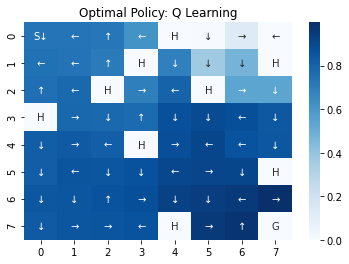

In [134]:
# Final policy!!
alpha = 0.6
epsilon = 0.8
gamma = 0.993
epsilon_decay = False
fin_ql_optimal_policy, fin_q_rewards, fin_ql_policy_sign, time_taken, ql_iterations = run_qlearning_small(env_small, total_episodes, num_iterations, num_state_small, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)
plot_policy_v2(fin_q_rewards, fin_ql_optimal_policy, grid=grid_small,grid_size=8, title="Q Learning")
print("Q learning-iteration converged at iteration#",len(ql_iterations))
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, fin_ql_optimal_policy, 100000) * 100, "%", time_taken, 's')

In [62]:
# Final policy!!
alpha = 0.5
epsilon = 0.8
gamma = 0.9
epsilon_decay = True
fin_ql_optimal_policy, fin_q_rewards, fin_ql_policy_sign, time_taken, ql_iterations = run_qlearning_big(env_big, total_episodes, num_iterations, num_state_big, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)
#plot_policy_v2(fin_q_rewards, fin_ql_optimal_policy, grid=grid_small,grid_size=8, title="Q Learning")
print("Q learning-iteration converged at iteration#",sum(ql_iterations))
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, fin_ql_optimal_policy, 10000) * 100, "%", time_taken, 's')

run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.5 Decay True
Average Rewards After 0 Episodes nan
Q learning-iteration converged at iteration# 1924339
Value Iterations - Optimal Policy Pass 0.0 % 31.09527897834778 s


### VI Policy

Value-iteration converged at iteration# 314.
Value Iterations - Optimal Policy Pass 59.75 % 0.8015561103820801 s


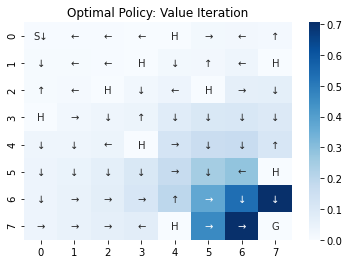

In [60]:
gamma = 0.99
value_table, utility_iteration, final_iterations, time_taken, error_lists, time_taken_lists = value_iteration(env_small, gamma=gamma)
policy_vi = extract_policy(value_table, gamma)
plot_policy_v2(value_table, policy_vi, grid=grid_small,grid_size=8 , title="Value Iteration")
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, policy_vi, 10000) * 100, "%", time_taken, 's')

Value-iteration converged at iteration# 997.
Value Iterations - Optimal Policy Pass 58.2108 % 2.8505101203918457 s


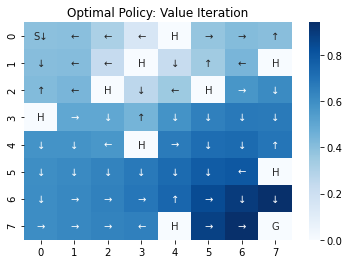

In [132]:
gamma = 0.99
value_table, utility_iteration, final_iterations, time_taken, error_lists, time_taken_lists = value_iteration(env_small, gamma=gamma)
policy_vi = extract_policy(value_table, gamma)
plot_policy_v2(value_table, policy_vi, grid=grid_small,grid_size=8 , title="Value Iteration")
print("Value Iterations - Optimal Policy Pass", run_policy(env_small, policy_vi, 500000) * 100, "%", time_taken, 's')

### PI Policy

Policy-Iteration converged at step 10.
Policy Iterations - Optimal Policy Pass 60.01 % 0.3857762813568115 s


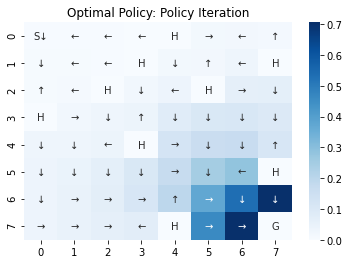

In [138]:
gamma = 0.9
policy, _, converged_iteration, time_taken, error_lists, value_table, time_taken_lists = policy_iteration(env=env_small, gamma=gamma)
plot_policy_v2(value_table, policy, grid=grid_small, grid_size=8, title="Policy Iteration")
print("Policy Iterations - Optimal Policy Pass", run_policy(env_small, policy, 10000) * 100, "%", time_taken, 's')

Policy-Iteration converged at step 11.
Policy Iterations - Optimal Policy Pass 58.084599999999995 % 1.588134527206421 s


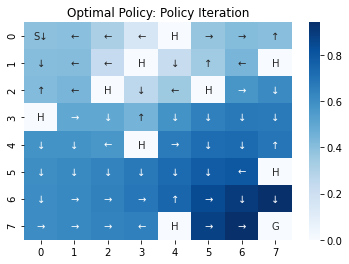

In [133]:
gamma = 0.99
policy, _, converged_iteration, time_taken, error_lists, value_table, time_taken_lists = policy_iteration(env=env_small, gamma=gamma)
plot_policy_v2(value_table, policy, grid=grid_small, grid_size=8, title="Policy Iteration")
print("Policy Iterations - Optimal Policy Pass", run_policy(env_small, policy, 500000) * 100, "%", time_taken, 's')